           Model  R2_Score  Mean Absolute Error  Mean Squared Error  \
0        XGBoost  0.668140            29.826596         2750.456854   
1           LSTM  0.575809             0.026662            0.003042   
2  Random Forest  0.977241            10.121469          188.629489   
3        Prophet  0.129447            47.203766         7215.156984   

   Root Mean Squared Error  
0                52.444798  
1                 0.055158  
2                13.734245  
3                84.942080  


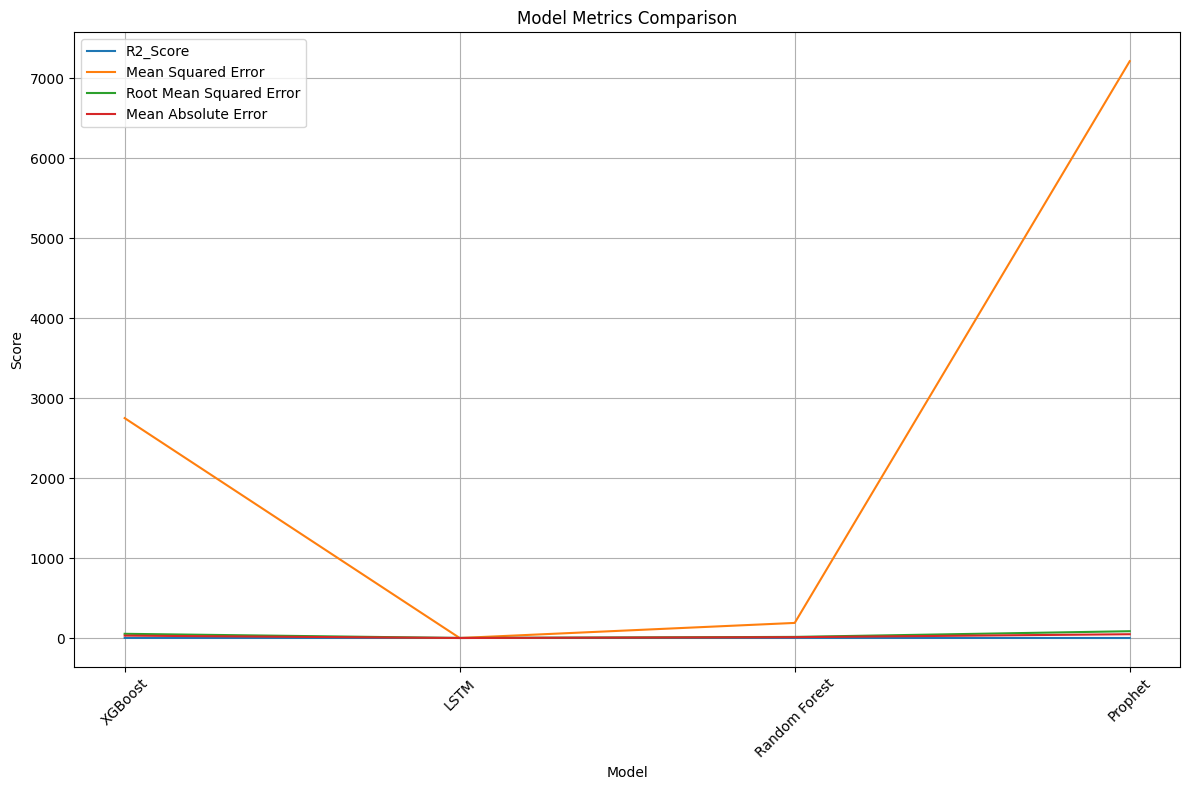

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load metrics from individual files
lstm_metrics = pd.read_csv(r"C:\Users\aryan\Desktop\XAI\XAI_Models\time_series\dataset3\LSTM\lstm_metrics.csv")
prophet_metrics = pd.read_csv(r"C:\Users\aryan\Desktop\XAI\XAI_Models\time_series\dataset3\Prophet\prophet_metrics.csv")
rf_metrics = pd.read_csv(r"C:\Users\aryan\Desktop\XAI\XAI_Models\time_series\dataset3\Random Forest\random_forest_metrics.csv")
xgb_metrics = pd.read_csv(r"C:\Users\aryan\Desktop\XAI\XAI_Models\time_series\dataset3\XGBoost\xgboost_metrics.csv")

# Combine all metrics into a single DataFrame
combined_metrics = pd.concat([xgb_metrics, lstm_metrics, rf_metrics, prophet_metrics], ignore_index=True)

# Display combined metrics
print(combined_metrics)

# Save combined metrics as CSV (optional)
combined_metrics.to_csv("combined_metrics_energy.csv", index=False)

# Plot comparison
plt.figure(figsize=(12, 8))
metrics_to_plot = ["R2_Score", "Mean Squared Error", "Root Mean Squared Error", "Mean Absolute Error"]
for metric in metrics_to_plot:
    plt.plot(combined_metrics["Model"], combined_metrics[metric], label=metric)

plt.title("Model Metrics Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


           Model  R2_Score  Mean Absolute Error  Mean Squared Error  \
0        XGBoost  0.983108            67.166057        1.016253e+05   
1           LSTM  0.025243             0.062513        7.403108e-03   
2  Random Forest  0.977182           194.834713        1.372731e+05   
3        Prophet  0.076282          1707.449038        5.557131e+06   

   Root Mean Squared Error  
0               318.787240  
1                 0.086041  
2               370.503888  
3              2357.356792  


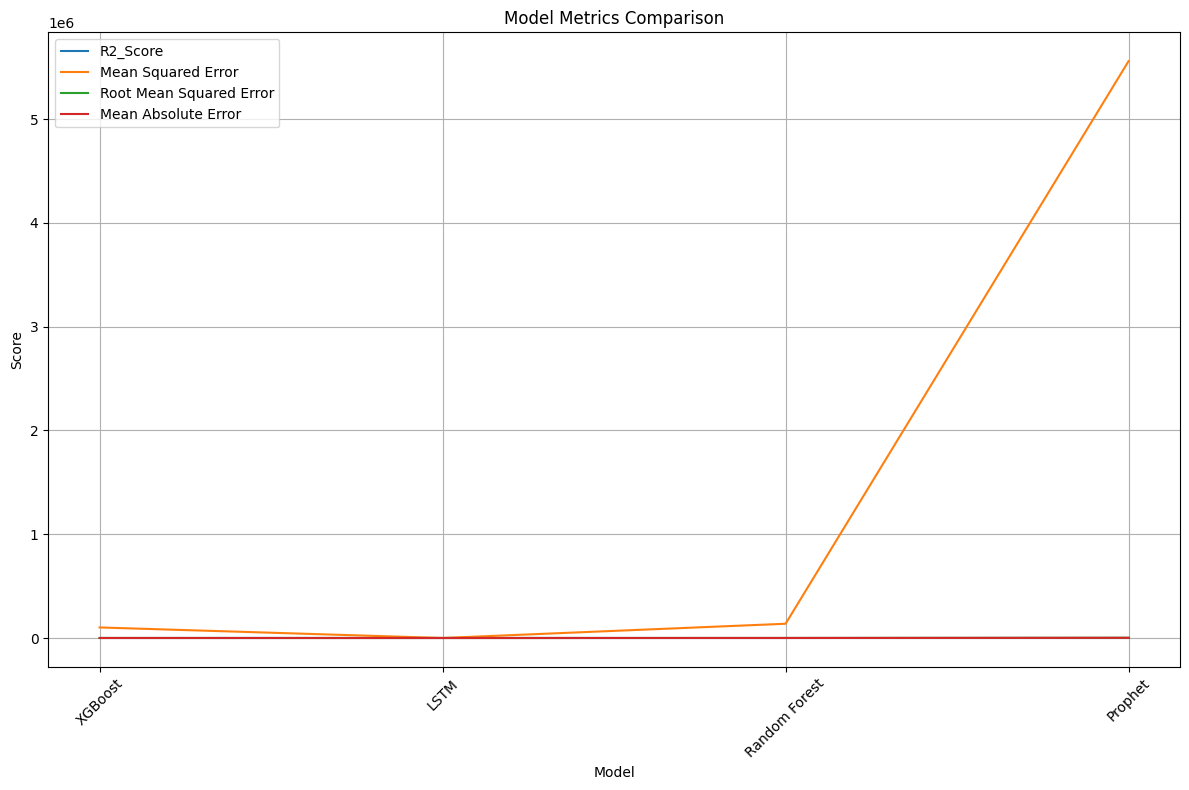

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load metrics from individual files
lstm_metrics = pd.read_csv(r"C:\Users\aryan\Desktop\XAI\XAI_Models\time_series\dataset4\LSTM\lstm_metrics.csv")
prophet_metrics = pd.read_csv(r"C:\Users\aryan\Desktop\XAI\XAI_Models\time_series\dataset4\Prophet\prophet_metrics.csv")
rf_metrics = pd.read_csv(r"C:\Users\aryan\Desktop\XAI\XAI_Models\time_series\dataset4\Random Forest\random_forest_metrics.csv")
xgb_metrics = pd.read_csv(r"C:\Users\aryan\Desktop\XAI\XAI_Models\time_series\dataset4\XGBoost\xgboost_metrics.csv")

# Combine all metrics into a single DataFrame
combined_metrics = pd.concat([xgb_metrics, lstm_metrics, rf_metrics, prophet_metrics], ignore_index=True)

# Display combined metrics
print(combined_metrics)

# Save combined metrics as CSV (optional)
combined_metrics.to_csv("combined_metrics_sales.csv", index=False)

# Plot comparison
plt.figure(figsize=(12, 8))
metrics_to_plot = ["R2_Score", "Mean Squared Error", "Root Mean Squared Error", "Mean Absolute Error"]
for metric in metrics_to_plot:
    plt.plot(combined_metrics["Model"], combined_metrics[metric], label=metric)

plt.title("Model Metrics Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd

# Load both CSV files
file1 = r"C:\Users\aryan\Desktop\XAI\XAI_Models\time_series\combined_metrics_energy.csv"  # Replace with your actual file path
file2 = r"C:\Users\aryan\Desktop\XAI\XAI_Models\time_series\combined_metrics_sales.csv"  # Replace with your actual file path

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Merge both datasets
merged_df = pd.concat([df1, df2], ignore_index=True)

# Save the merged file
merged_file_path = r"C:\Users\aryan\Desktop\XAI\XAI_Models\time_series\combined_metrics_all_datasets.csv"
merged_df.to_csv(merged_file_path, index=False)

print("Merged CSV saved at:", merged_file_path)


Merged CSV saved at: C:\Users\aryan\Desktop\XAI\XAI_Models\time_series\combined_metrics_all_datasets.csv


In [7]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
file_path = r"C:\Users\aryan\Desktop\XAI\XAI_Models\time_series\combined_metrics_all_datasets.csv"
df = pd.read_csv(file_path)

# List of metrics to analyze
metrics = ["R2_Score", "Mean Squared Error", "Root Mean Squared Error", "Mean Absolute Error"]

# Perform ANOVA for each metric
anova_results = {}
for metric in metrics:
    # Extract data for each model
    model_groups = [df[df["Model"] == model][metric] for model in df["Model"].unique()]
    
    # Perform ANOVA test
    f_stat, p_value = stats.f_oneway(*model_groups)
    
    # Store results
    anova_results[metric] = {"F-statistic": f_stat, "p-value": p_value}

# Convert results to a DataFrame and display
anova_df = pd.DataFrame(anova_results).T
print(anova_df)


                         F-statistic   p-value
R2_Score                    6.853515  0.046945
Mean Squared Error          0.975833  0.487353
Root Mean Squared Error     0.918452  0.508143
Mean Absolute Error         0.989867  0.482448
